In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import torch

from raytracerthing import RayTracerThing, Activations

np.random.seed(42)

In [2]:
digits = load_digits()
digits.keys()

y = digits['target']

X = digits['images']
X = X / X.max()
N = X.shape[0]
image_shape = X.shape[1:]

print(N, image_shape)

print(y[:5])

1797 (8, 8)
[0 1 2 3 4]


In [3]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [5]:
%%time

clf = RayTracerThing(input_shape=image_shape,
                     hidden_layer_shape=(10, 10), 
                     n_layers=5,
                     n_classes=10,
                     activation_func=lambda x: torch.softmax(x, dim=0),
                     loss_func=torch.nn.functional.cross_entropy,
                     learning_rate=1)

CPU times: user 78.1 ms, sys: 0 ns, total: 78.1 ms
Wall time: 83 ms


In [6]:
%time clf.fit(X_train, y_train, batch_size=16, n_epochs=10000)

Epoch 1 of 10000 - train_loss: 2.3004 - train_acc: 0.1475 - val_loss: 2.3023 - val_acc: 0.1597
Epoch 2 of 10000 - train_loss: 2.2960 - train_acc: 0.2436 - val_loss: 2.3020 - val_acc: 0.2569
Epoch 3 of 10000 - train_loss: 2.2898 - train_acc: 0.3096 - val_loss: 2.3015 - val_acc: 0.3264
Epoch 4 of 10000 - train_loss: 2.2788 - train_acc: 0.3777 - val_loss: 2.3005 - val_acc: 0.4410
Epoch 5 of 10000 - train_loss: 2.2559 - train_acc: 0.4228 - val_loss: 2.2983 - val_acc: 0.5139
Epoch 6 of 10000 - train_loss: 2.2131 - train_acc: 0.4645 - val_loss: 2.2935 - val_acc: 0.4826
Epoch 7 of 10000 - train_loss: 2.1706 - train_acc: 0.4539 - val_loss: 2.2899 - val_acc: 0.4583
Epoch 8 of 10000 - train_loss: 2.1448 - train_acc: 0.4567 - val_loss: 2.2873 - val_acc: 0.4514
Epoch 9 of 10000 - train_loss: 2.1207 - train_acc: 0.4730 - val_loss: 2.2852 - val_acc: 0.4826
Epoch 10 of 10000 - train_loss: 2.0959 - train_acc: 0.5224 - val_loss: 2.2827 - val_acc: 0.5243
Epoch 11 of 10000 - train_loss: 2.0748 - train_ac

Epoch 85 of 10000 - train_loss: 1.9309 - train_acc: 0.6817 - val_loss: 2.2724 - val_acc: 0.7812
Epoch 86 of 10000 - train_loss: 1.9309 - train_acc: 0.6817 - val_loss: 2.2724 - val_acc: 0.7812
Epoch 87 of 10000 - train_loss: 1.9309 - train_acc: 0.6817 - val_loss: 2.2724 - val_acc: 0.7812
Epoch 88 of 10000 - train_loss: 1.9309 - train_acc: 0.6817 - val_loss: 2.2724 - val_acc: 0.7812
Epoch 89 of 10000 - train_loss: 1.9309 - train_acc: 0.6817 - val_loss: 2.2724 - val_acc: 0.7812
Epoch 90 of 10000 - train_loss: 1.9309 - train_acc: 0.6817 - val_loss: 2.2724 - val_acc: 0.7812
Epoch 91 of 10000 - train_loss: 1.9309 - train_acc: 0.6817 - val_loss: 2.2724 - val_acc: 0.7812

Stopping early.

CPU times: user 12.8 s, sys: 1.11 s, total: 14 s
Wall time: 13.6 s


In [7]:
clf.score(X_test, y_test)

tensor(0.2083)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.12      0.06      0.08        33
          1       0.08      0.04      0.05        28
          2       0.00      0.00      0.00        33
          3       0.43      0.71      0.53        34
          4       0.16      0.24      0.19        46
          5       0.29      0.43      0.35        47
          6       0.23      0.40      0.29        35
          7       0.00      0.00      0.00        34
          8       0.25      0.10      0.14        30
          9       0.00      0.00      0.00        40

avg / total       0.16      0.21      0.17       360



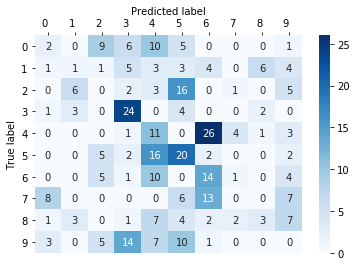

In [9]:
cm = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

cm.yaxis.set_ticklabels(cm.yaxis.get_ticklabels(), rotation=0, ha='right')
cm.xaxis.set_ticklabels(cm.xaxis.get_ticklabels(), rotation=0, ha='right')
cm.xaxis.tick_top()
cm.xaxis.set_label_position('top')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

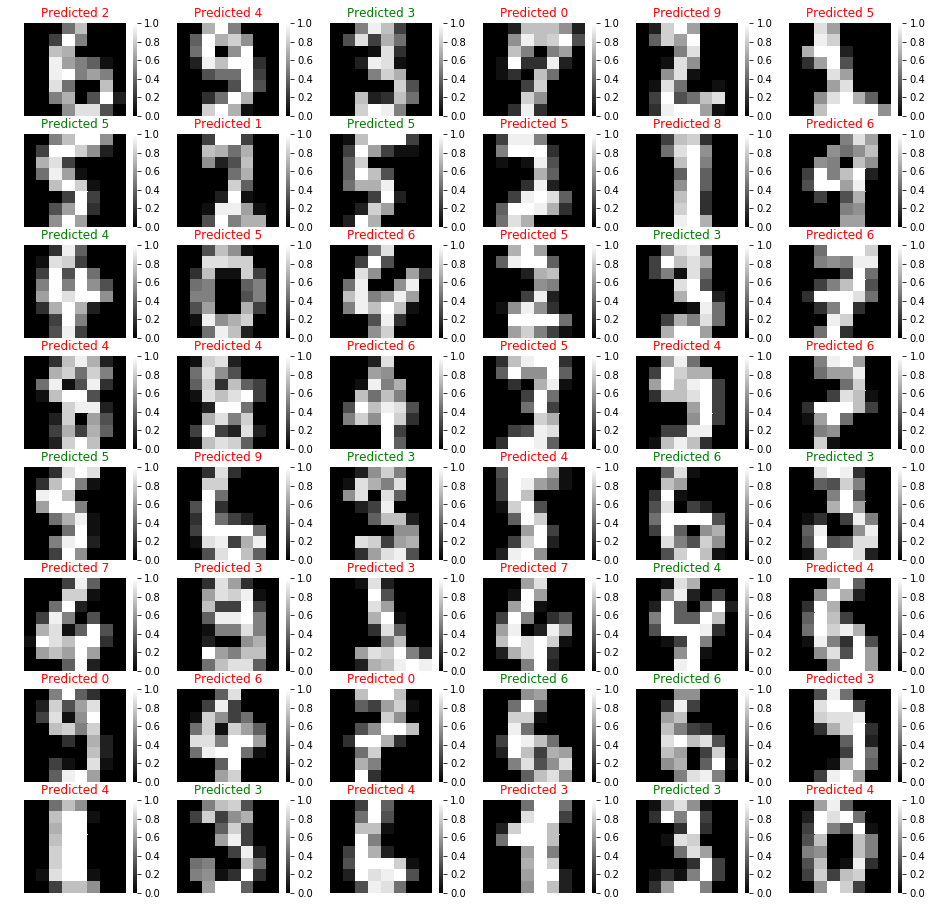

In [10]:
n_rows = 8
n_cols = 6
n_total = n_rows * n_cols
n_total = min(n_total, N)

width_ratio = 2.7
height_ratio = 2

figsize = (int(width_ratio * n_cols), int(height_ratio * n_rows))

fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
axes = axes.ravel()

for ax, image, expected, actual in zip(axes, X_test[:n_total], y_test[:n_total], y_pred[:n_total]):
    sns.heatmap(image, vmin=0.0, vmax=1.0, cmap='gray', ax=ax)
    ax.set_axis_off()

    color = 'green' if expected == actual else 'red'
    ax.set_title('Predicted %d' % actual, color=color)

plt.show()

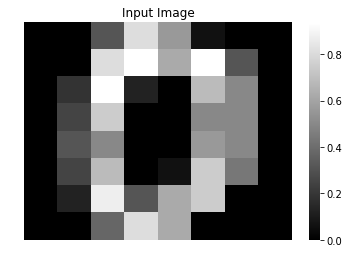

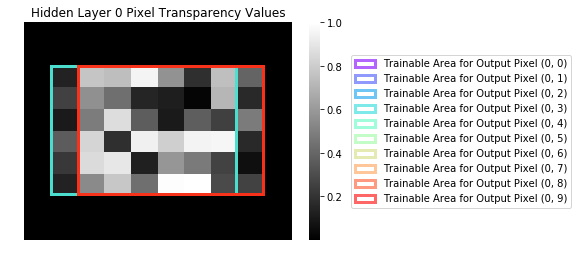

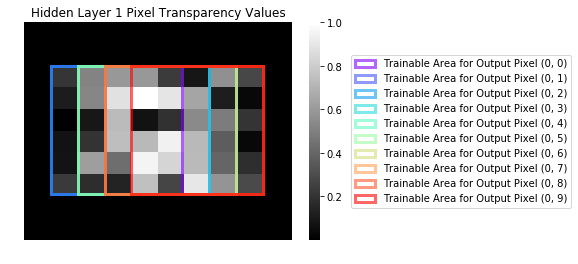

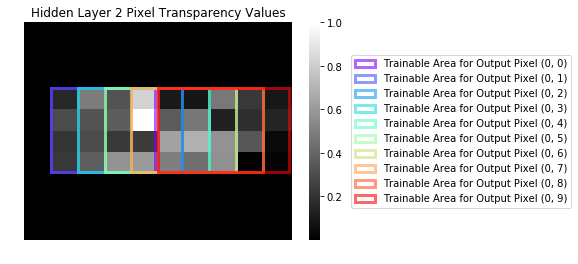

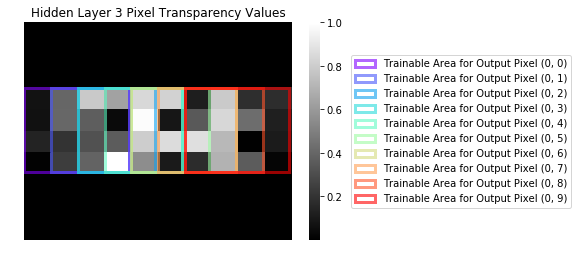

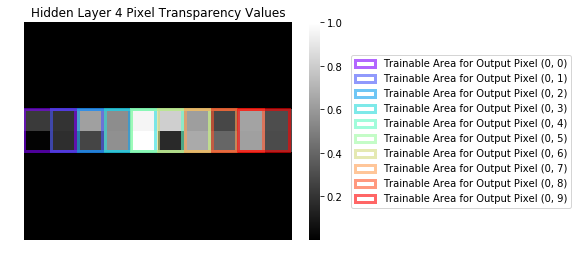

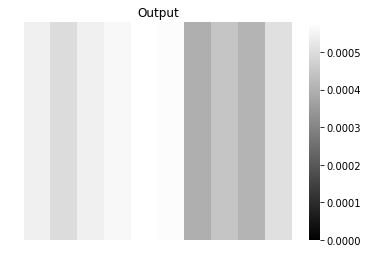

In [11]:
colors = plt.cm.rainbow(np.linspace(0,1,clf.output_layer.n_rows * clf.output_layer.n_cols))
        
ax = sns.heatmap(X[0], cmap='gray')
ax.set(title='Input Image')
ax.set_axis_off()
plt.show()

for i, layer in enumerate(clf.hidden_layers):              
    ax = sns.heatmap(layer.pixel_values, cmap='gray')
        
    for row in range(clf.output_layer.n_rows):
        for col in range(clf.output_layer.n_cols):
            trained_pixels = clf.grid_W_map[row][col][i].keys() 

            min_extent = clf.layer_shape
            max_extent = (0, 0)

            for grid_coord in trained_pixels:
                grid_row, grid_col = grid_coord

                if grid_row < min_extent[0]:
                    min_extent = (grid_row, min_extent[1])

                if grid_row > max_extent[0]:
                    max_extent = (grid_row, max_extent[1])

                if grid_col < min_extent[1]:
                    min_extent = (min_extent[0], grid_col)

                if grid_col > max_extent[1]:
                    max_extent = (max_extent[0], grid_col)

            height = (max_extent[0] - min_extent[0]) + 0.9
            width = (max_extent[1] - min_extent[1]) + 0.9
            
            rect = patches.Rectangle((min_extent[1], min_extent[0]), width, height, 
                                     linewidth=3, alpha=0.6, edgecolor=colors[col], facecolor='none', 
                                     label='Trainable Area for Output Pixel (%d, %d)' % (row, col))

            ax.add_patch(rect)
            
        ax.set_axis_off()
        ax.set(title='Hidden Layer %d Pixel Transparency Values' % i)
        ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
        plt.show()
        
ax = sns.heatmap(clf.predict_proba(X).detach().numpy()[0].reshape(1, -1), vmin=0, cmap='gray')
ax.set(title='Output')
ax.set_axis_off()
plt.show()